# Task 1

Name: Vihaan Shah

#### To Predict the percentage of marks of an student based on the number of Study hours

Firstly we will import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now we will import the data from the link

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)
print('Data imported successfully')
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


We will plot a graph between Scores and hours to get an idea of their linearity.

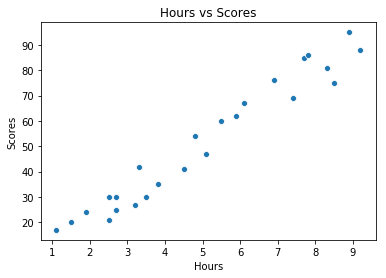

In [3]:
a=sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title('Hours vs Scores')
plt.show()

Introducing Training and testing the data

In [4]:
from sklearn.model_selection import train_test_split
x= df.iloc[:,:-1].values
y= df.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

Training simple Linear Regression on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We will visualize the results

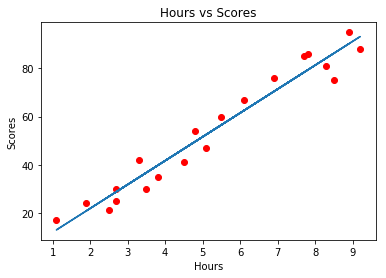

In [6]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train))
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Predicting the result

In [7]:
y_predict=lr.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Always compare the actual and the predicted values

In [8]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now What will be predicted score if a student studies for 9.25 hrs/ day?

In [9]:
hours=9.25
new_test=np.array([hours])
new_test=new_test.reshape(-1,1)
pred_value=lr.predict(new_test)
print('Number Of Hours: {}'.format(hours))
print('Score predicted: {}'.format(pred_value[0]))

Number Of Hours: 9.25
Score predicted: 93.69173248737539


Evualating the model performance

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('R2:',metrics.r2_score(y_test,y_predict))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
R2: 0.9454906892105354
